In [ ]:
#company hierarchy

In [2]:
import pandas as pd

import plotly.graph_objects as go

import networkx as nx
import ast
%matplotlib inline  
#from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("company_master_table.csv", 
                   dtype={"child_cw_id_list" :'str',
                          "parent_cw_id_list": 'str'}, converters={1:ast.literal_eval})

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
CW_ID = 'cw_id'
INDUSTRY_NAME = 'industry_name'
SECTOR_NAME = 'sector_name'
NUM_PARENTS = 'num_parents'
NUM_CHILDREN = 'num_children'
TOP_PARENT_ID = 'top_parent_id'
COMPANY_NAME = 'company_name'
CHILD_CW_ID_LIST = 'child_cw_id_list'
PARENT_CW_ID_LIST = 'parent_cw_id_list'


In [5]:
def list_parse(s):
    strings = str(s).strip("[]").split(",")
    ls = []
    for i in strings:
        try:
            ls.append(int(float(i.strip())))
        except (ValueError):
            ""
    return ls

In [6]:
data[CHILD_CW_ID_LIST] = data[CHILD_CW_ID_LIST].apply(lambda x: list_parse(x))
data[PARENT_CW_ID_LIST] = data[PARENT_CW_ID_LIST].apply(lambda x: list_parse(x))

In [68]:
families = data[((data[NUM_PARENTS]> 0) | (data[NUM_CHILDREN] > 0))]  #i might not want to do this

def replace_missing(x, v):
    if str(x) == 'nan':
        return v
    else:
        return x
families[INDUSTRY_NAME] = families[INDUSTRY_NAME].apply(lambda x: replace_missing(x, "Unknown Industry"))
families[SECTOR_NAME] = families[SECTOR_NAME].apply(lambda x: replace_missing(x, "Unknown Sector"))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
#join with the location 
location = pd.read_csv('corpwatch_api_tables_csv/company_locations.csv', sep = "\t", escapechar='\\')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.



row_id
sector_name                       top_parent_id         
Agricultural production- crops    14966          2717588
                                  37308          2898241
                                  240882         3080397
                                  348491         3323815
                                  687788         3633093
...                                                  ...
Wholesale trade--nondurable goods 762331         3695114
                                  784040         3734441
                                  892491         3845753
                                  935948         3875010
                                  946519         3888869

[14105 rows x 1 columns]

In [70]:
location.columns

Index(['location_id', 'cw_id', 'date', 'type', 'raw_address', 'street_1',
       'street_2', 'city', 'state', 'postal_code', 'country', 'country_code',
       'subdiv_code', 'min_year', 'max_year', 'most_recent'],
      dtype='object')

In [71]:
def unique_non_nan(elem):
    return [a for a in list(pd.unique(elem))]
#maybe shouldn't just take the first one 
location_filtered = location[location['max_year'] > 2018]
location_aggregations = {'city': "first",
                         'state': "first",
                         'country_code':  "first"}
location_agg = location_filtered.groupby('cw_id').agg(location_aggregations)
#location_df = location_filtered[['cw_id', 'city', 'state', 'country_code']]

,cw_id,row_id
top_parent_id,,
1,"[124905, 124906, 124907, 124908, 442465, 49206...",9
2,"[185844, 198285, 198286, 198287, 198288, 19828...",30
3,"[101328, 101408, 101414, 101418, 101420, 10158...",1275
11,"[410178, 410392, 410393, 410394, 410395, 41039...",51
13,"[124888, 124889, 124890, 737227, 834641]",5
...,...,...
1079926,"[854044, 1116949, 1117034, 1119095, 1119132]",5
1079933,[1117532],1
1082663,"[1116924, 1116933, 1116938, 1116939, 1117003, ...",80


In [73]:
families_location = pd.merge(families, location_agg,
                     left_on='cw_id', 
                     right_on='cw_id',
                     how='left')

In [74]:
families_location.head()

,Unnamed: 0,row_id,cw_id,most_recent,year,cik,irs_number,best_location_id,sic_code,industry_name,...,top_parent_id,company_name,max_year,min_year,no_sic,child_cw_id_list,parent_cw_id_list,city,state,country_code
0,0,18,37,1,2019,3153,630004250.0,74,4911.0,Electric services,...,37,ALABAMA POWER CO,2019,2003,0,"[1665, 993179, 101861, 1018259, 781, 101870, 1...","[12009, 22569, 781, 1197, 1665]",BIRMINGHAM,AL,US
1,1,24,45,1,2019,3499,510100517.0,88,6798.0,Real estate investment trusts,...,9019,ALEXANDERS INC,2019,2003,0,"[1038175, 1038176, 1038177, 1038178, 1038179, ...","[14480, 9019]",PARAMUS,NJ,US
2,2,39,69,1,2019,4515,131502798.0,137,4512.0,"Air transportation, scheduled",...,105,AMERICAN AIRLINES INC,2019,2003,0,"[964843, 964842, 411832, 411833, 416126, 41613...",[105],FT WORTH,TX,US
3,3,65,120,1,2019,6879,540124790.0,246,4911.0,Electric services,...,75,APPALACHIAN POWER CO,2019,2003,0,"[993634, 834826, 696650, 992937, 136825, 95658...","[956587, 1029138, 75, 927, 1345, 1492, 1674]",COLUMBUS,OH,US
4,4,79,130,1,2019,7323,831918668.0,273,4911.0,Electric services,...,1180,ENTERGY ARKANSAS LLC,2019,2003,0,"[899487, 1001712, 1180]",[590084],LITTLE ROCK,AR,US


In [75]:
indexed_groups = families_location.set_index(CW_ID) ## should not use the filtered list 

In [76]:
family_groups = families_location.groupby(families_location[TOP_PARENT_ID])

In [214]:
def create_location_string(row):
    country = row['country_code']
    city = row['city']
    if country == 'nan':
        return ""
    elif str(country) == 'US':
        state = row['state']
        return str(city) + ", " + str(state)
    else:
        return str(city) + ", " + str(country)

In [215]:
import math

def print_grouped_columns(df, column_name, sortby, limit = 100):      
    for (g, data) in df:
        print(g)
        d = data.sort_values(by = sortby)                        
        for (i,c) in d.iterrows():
            print("\t \t \t " + str(c[column_name]) + " " +  create_location_string(c) +" ") 


In [216]:
def get_name_by_id(index_df, cw_id):
    row = index_df.loc[cw_id]
    return row[COMPANY_NAME]

In [217]:
def create_top_parent_report(group_df, company_id, name_string):
    agg_dictionary = {"row_id" : "count",
                  CW_ID: unique_non_nan,
                  COMPANY_NAME: unique_non_nan,
                 }
    COMPANY_COUNT = "company_count"
    industry_df_group = group_df.groupby(by = "industry_name")
    
    industry_df = industry_df_group.agg(agg_dictionary)
    industry_df.rename(columns = {"row_id": COMPANY_COUNT}, inplace = True)
    top_industries_df = industry_df.sort_values(by = COMPANY_NAME, ascending=False)
    top_industries = [k for k in top_industries_df[COMPANY_COUNT].to_dict().keys()]
   
    sectors = group_df.groupby(SECTOR_NAME).count() 
    sectors.rename(columns = {"row_id": COMPANY_COUNT}, inplace = True)
    subsidiaries = group_df[COMPANY_NAME]

    sub = [x for x in subsidiaries]
    print("Parent company information "  + str(name_string)) 
    locations = group_df.groupby('country_code').agg(agg_dictionary)
    l = [k for k in locations['row_id'].to_dict().keys()]
    if len(l) > 1:
        print (" * Is Multinational")
    print("* Has " + str(len(subsidiaries)) + " subsidiaries")
    
    #change to take the top 3 or so industries if they exist 
    print("* Top industries " + str(top_industries))
    industris_clean = industry_df[industry_df.index != "Unknown Industry"]
    # needs to be renamed to the count
    industris_clean.plot.pie(y = COMPANY_COUNT, legend = False, title = "Subsidiaries By Industry") 
    plt.show()
    
    sectors_clean = sectors[sectors.index != "Unknown Sector"]
    sectors_clean.plot.pie(y = COMPANY_COUNT, legend = False, title = "Subsidiaries by Sector")
    plt.show()
    
    print("Subsidiaries locations: " + str(set(l)))
    print("==================== SUBSIDIARIES BY INDUSTRY ============================= ")
    print_grouped_columns(industry_df_group, COMPANY_NAME, NUM_CHILDREN, limit = 100)
    
    return industry_df_group
 

In [218]:
def generate_company_report(company_id):
    co_name = get_name_by_id(indexed_groups, company_id)
    row = indexed_groups.loc[company_id]
    industry = row[INDUSTRY_NAME]
    parents = row[PARENT_CW_ID_LIST]
    top_parent = row[TOP_PARENT_ID]
    top_parent_name = get_name_by_id(indexed_groups, top_parent)
    print("Company: " + str(co_name) + "  company_id: " + str(company_id))
    print("Location: " + create_location_string(row))    
    print("=====================")
    print("")
    #size by industry, number of subsidiaries

    if top_parent != company_id:
        if top_parent in parents:
            print("* t is a subsidiary of: " + str(top_parent_name) + " (" + str(top_parent) + ")")
        else:
            print("* is owned by " + str(parents))
            print("* is an indirect subsidiary of  ")
            print("* is a subsidiary of: " + str(top_parent_name) + " " + str(top_parent) + ")")
        #Ask the user if they would like to see the top parent report before showing it? 
        
        if float(row[NUM_CHILDREN]) > 0.0:
            children = row[CHILD_CW_ID_LIST]
            print("* owns " + str(children) + " companies")

    group = family_groups.get_group(top_parent)   
    create_top_parent_report(group, top_parent, top_parent_name)
    
    #wish list 
    #is a multinational
    #ranking by industry
    #number of child locations
    #subsidiaries locations


Company: ALABAMA POWER CO  company_id: 37
Location: BIRMINGHAM, AL

Parent company information ALABAMA POWER CO
* Has 6 subsidiaries
* Top industries ['Electric services', 'Unknown Industry']


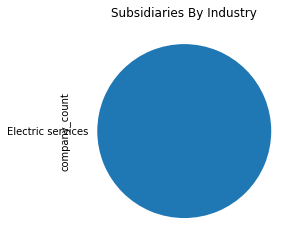

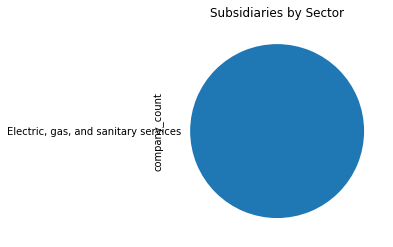

Subsidiaries locations: {'US'}
==================== SUBSIDIARIES BY INDUSTRY ============================= 
Electric services
	 	 	 ALABAMA POWER CO BIRMINGHAM, AL 
Unknown Industry
	 	 	 ) Georgia Pacific Belux S.P.R.L. nan, nan 
	 	 	 D) Troy Fibers Ltd nan, nan 
	 	 	 E) Ivandon Holding Oy nan, nan 
	 	 	 F) Nokian Palkallispal Velutoy nan, nan 
	 	 	 . Georgia Pacific Iberia Holdings SL nan, nan 


In [219]:
generate_company_report(37)

Company: GEORGIA POWER CO  company_id: 781
Location: ATLANTA, GA

Parent company information GEORGIA POWER CO
* Has 162 subsidiaries
* Top industries ['Natural gas distribution', 'Unknown Industry', 'Electric services']


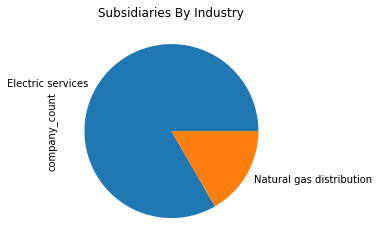

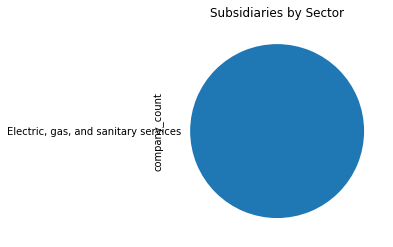

Subsidiaries locations: {'US'}
==================== SUBSIDIARIES BY INDUSTRY ============================= 
Electric services
	 	 	 GULF POWER CAPITAL TRUST I nan, nan 
	 	 	 GULF POWER CAPITAL TRUST II nan, nan 
	 	 	 GEORGIA POWER CO ATLANTA, GA 
	 	 	 MISSISSIPPI POWER CO GULFPORT, MS 
	 	 	 SOUTHERN CO ATLANTA, GA 
Natural gas distribution
	 	 	 SOUTHERN Co GAS ATLANTA, GA 
Unknown Industry
	 	 	 Georgia Natural Gas Co nan, nan 
	 	 	 Georgia Power Capital Trust X nan, nan 
	 	 	 Georgia Power Capital Trust XI nan, nan 
	 	 	 Gulf Power Capital Trust III nan, nan 
	 	 	 Gulf Power Capital Trust IV nan, nan 
	 	 	 Gulf Power Capital Trust V nan, nan 
	 	 	 Gulf Power Capital Trust VI nan, nan 
	 	 	 Gulf Power Co nan, nan 
	 	 	 Mississippi Power Capital Trust II nan, nan 
	 	 	 Mississippi Power Capital Trust III nan, nan 
	 	 	 Mississippi Power Capital Trust IV nan, nan 
	 	 	 Northern Illinois Gas Co nan, nan 
	 	 	 NUI Corp nan, nan 
	 	 	 Savannah Electric Capital Trust II nan

In [220]:
generate_company_report(781)

In [206]:
family_graph = {}

from collections import defaultdict
#Loop through the top parent ids
#relationships are parent ---> child 
from collections.abc import Iterable   # import directly from collections for Python < 3.3
failed_rows = 0
for name, group in family_groups:
    G = nx.DiGraph()
    for index, row in group.iterrows():
        cw_id = int(row[CW_ID])
        children = row[CHILD_CW_ID_LIST]
        parents = row[PARENT_CW_ID_LIST]
        try:
            for c in children:
                if(c != cw_id):
                    G.add_edge(cw_id, c)
            for p in parents:
                if p != cw_id:
                    G.add_edge(p, cw_id)
        except (ValueError):
            print("?")
        family_graph[name] = G


In [ ]:
#H.add_nodes_from([1,3,4,5])
import math
J = nx.DiGraph()
J.add_edges_from([(1,2.0), (3, 2) , (3,4), (int(8.0), 9)])

In [ ]:
%matplotlib inline  
#from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
def plot_graph(G):
    nx.draw_shell(G, with_labels=True)
    plt.show()
g = family_graph[130]

plot_graph(J)

In [ ]:
family_graph[37].edges

In [ ]:
g.subgraph([75, 120]).edges

In [ ]:
get_name_by_id(indexed_groups, 37)

Company: PEPSICO INC  company_id: 1419
Location: PURCHASE, NY

Parent company information PEPSICO INC
 * Is Multinational
* Has 1777 subsidiaries
* Top industries ['Beverages', 'Unknown Industry']


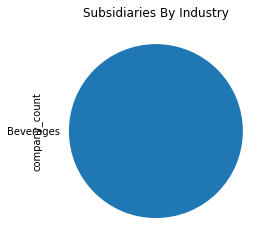

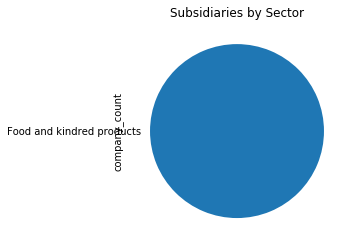

Subsidiaries locations: {'IL', 'KG', 'GI', 'TW', 'UY', 'CZ', 'RU', 'KR', 'GT', 'CR', 'NI', 'CH', 'AU', 'VN', 'LT', 'IN', 'TR', 'SA', 'HK', 'TH', 'CA', 'KY', 'EE', 'BY', 'SK', 'BR', 'PE', 'NL', 'PY', 'NO', 'AZ', 'BM', 'UA', 'LI', 'EG', 'US', 'EC', 'LV', 'AM', 'IE', 'CN', 'MX', 'PH', 'RS', 'LU', 'PT', 'NZ', 'PL', 'RO', 'ID', 'MU', 'BA', 'CO', 'SG', 'AR', 'NG', 'BB', 'FI', 'CL', 'BE', 'DK', 'PK', 'TT', 'DE', 'DO', 'FR', 'BO', 'GR', 'IT', 'BD', 'CY', 'SV', 'MY', 'ZA', 'GB', 'HN', 'KZ', 'AT', 'MA', 'PA', 'JP', 'ES', 'AE', 'HU'}
==================== SUBSIDIARIES BY INDUSTRY ============================= 
Beverages
	 	 	 PEPSICO INC (PURCHASE, NY )
Unknown Industry
	 	 	 Bermuda Holdings LLC (unknown location )
	 	 	 Matutano Sociedade de Produtos Alimentares Unipessoal Lda (unknown location )
	 	 	 Marbo Produkt d.o.o. (unknown location )
	 	 	 Marbo d.o.o. Laktasi (nan, BA )
	 	 	 Malpensa Consultadoria e Servicos Sociedade Unipessoal. Lda. (unknown location )
	 	 	 Lebedyansky Holding Co (

In [207]:
generate_company_report(1419)